In [16]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [17]:
from echolens import simulation
from echolens import utils

In [18]:
cmbspectra = simulation.CMBspectra()

In [19]:
cl_len = cmbspectra.get_lensed_spectra(dl=False)

In [20]:
np.random.seed(212175)

In [21]:
tlm,elm,blm = hp.synalm([cl_len['tt'],cl_len['ee'],cl_len['bb'],cl_len['te']], lmax=2048, new=True)

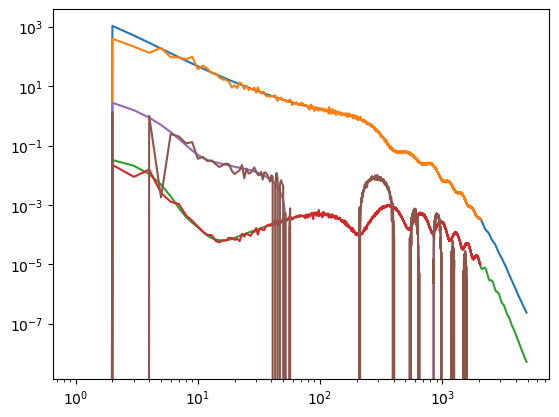

In [22]:
plt.loglog(cl_len['tt'], label='TT')
plt.loglog(hp.alm2cl(tlm), label='TT alm')
plt.loglog(cl_len['ee'], label='EE')
plt.loglog(hp.alm2cl(elm), label='EE alm')
plt.loglog(cl_len['te'], label='TE')
plt.loglog(hp.alm2cl(tlm,elm), label='TE alm')

In [23]:
mytlm = hp.synalm(cl_len['tt'], lmax=2048)

In [24]:
myelm = utils.synalm_c1(cl_len['tt'], mytlm, cl_len['ee'], cl_len['te'])

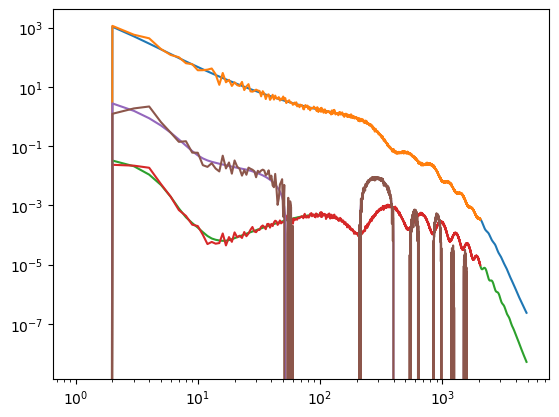

In [25]:
plt.loglog(cl_len['tt'], label='TT')
plt.loglog(hp.alm2cl(mytlm), label='TT alm')
plt.loglog(cl_len['ee'], label='EE')
plt.loglog(hp.alm2cl(myelm), label='EE alm')
plt.loglog(cl_len['te'], label='TE')
plt.loglog(hp.alm2cl(mytlm,myelm), label='TE alm')

In [26]:
cl_pot = cmbspectra.get_lens_potential(dl=False)

In [27]:
plm = utils.synalm_c2(cl_len['tt'],mytlm,cl_len['ee'],myelm,cl_pot['pp'],cl_pot['pt'],cl_pot['pe'])

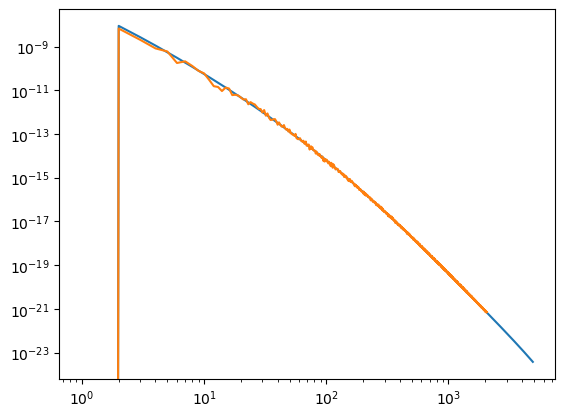

In [28]:
plt.loglog(cl_pot['pp'], label='PP')
plt.loglog(hp.alm2cl(plm), label='PP alm')

[]

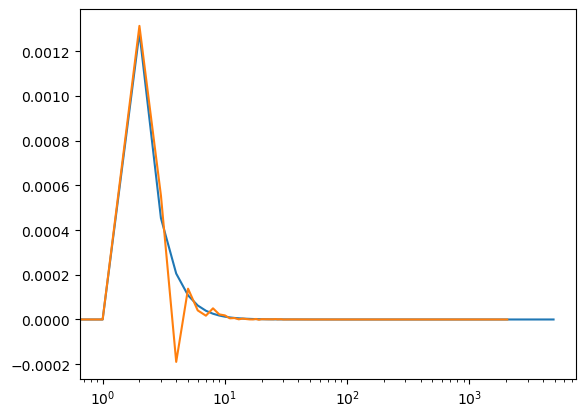

In [29]:
plt.plot(cl_pot['pt'], label='PT')
plt.plot(hp.alm2cl(plm,mytlm), label='PT alm')
plt.semilogx()

[]

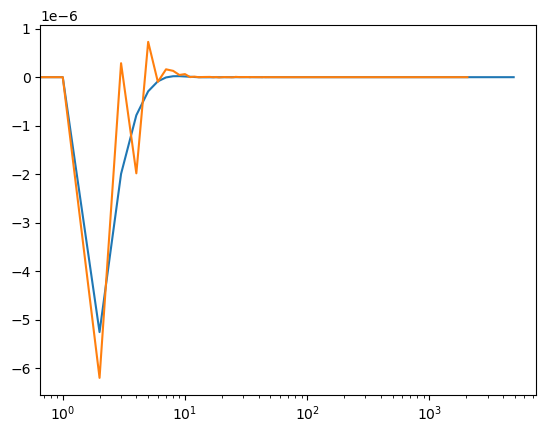

In [30]:
plt.plot(cl_pot['pe'], label='PT')
plt.plot(hp.alm2cl(myelm,plm), label='PT alm')
plt.semilogx()